# Whole Rock calculations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chemMap as cm
import pickle

In [2]:
with open('GalapGabbrosQuantData.pkl', 'rb') as f:
    Quant = pickle.load(f)

In [3]:
# randomly sample a region, at least 50% of total sample to calculate whole-rock composition from.
WR_error = {}
for s in ['03b', '04b']:
    WR_error[s] = cm.wholerock(Quant[s], list(Quant[s].keys())[:-3], X = 0.5, iterations = 200)

/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/chemMap/src/chemMap/quant.py:276: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WR[O].loc[i] = np.nansum(ForWR[O].values*ForWR['rho'].values)/np.nans

In [4]:
# anhydrous normalization of results
for s in ['03b', '04b']:
    for i in range(len(WR_error[s]['SiO2'])):
        WR_error[s].loc[i,:] = 100*WR_error[s].loc[i,:]/WR_error[s].loc[i,:].sum()

In [5]:
# calculate whole-rock for each sample using all available pixels that are not classified as nans
WholeRock = pd.DataFrame(index = list(Quant.keys()), 
                         columns = list(Quant['03b'].keys())[:-3], data = np.zeros((5, len(list(Quant['03b'].keys())[:-3]))))
for s in Quant:
    WholeRock.loc[s,:] = cm.wholerock(Quant[s], list(Quant[s].keys())[:-3]).loc[0]
    WholeRock.loc[s,:] = 100*WholeRock.loc[s,:]/WholeRock.loc[s,:].sum()

with open('GalapWholeRock.pkl', 'wb') as f:
    pickle.dump(WholeRock,f)

/Users/gleesonm/Library/CloudStorage/GoogleDrive-gleesonm@berkeley.edu/My Drive/2022/GitHub/chemMap/src/chemMap/quant.py:302: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  WR[O].loc[0] = np.nansum(ForWR[O].values*ForWR['rho'].values)/np.nans

In [6]:
# load the Lyons et al. (2007) data for comparison.
Lyons = pd.read_excel('PubData/LyonsWholeRock.xlsx')
Lyons.loc[:,['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'MnO', 'FeO']] = 100*Lyons.loc[:,['Na2O', 'MgO', 'Al2O3', 'SiO2', 'K2O', 'CaO', 'TiO2', 'MnO', 'FeO']].values/Lyons.loc[:,'Total'].values.reshape(5,1)
Lyons

,Sample,Set,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Cr2O3,MnO,FeO,Total
0,FLX511,Lyons,0.745379,21.546412,11.111111,45.279269,0.119261,10.435301,0.347843,NaN,0.167959,9.610415,100.62
1,FLX513,Lyons,1.773506,9.244031,19.052809,48.370158,0.059447,16.615476,0.346775,NaN,0.074309,3.527197,100.93
2,FLX516,Lyons,1.493718,10.693441,17.261846,48.590365,0.059353,15.738451,0.407558,NaN,0.091008,4.570185,101.09
3,FLX556,Lyons,2.716049,5.748148,22.834568,48.316049,0.118519,15.308642,0.417778,NaN,0.063210,3.219753,101.25
4,FLX559,Lyons,0.640384,14.958975,12.277366,45.887533,0.030018,18.160897,0.857515,NaN,0.150090,7.074245,99.94


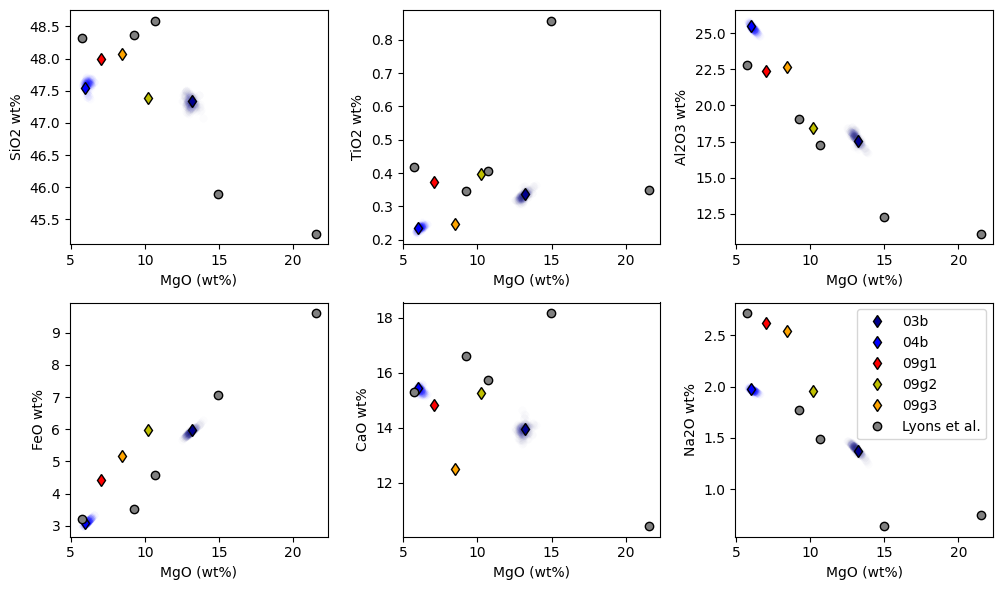

In [7]:
oxides = [['SiO2', 'TiO2', 'Al2O3'],['FeO', 'CaO', 'Na2O']]
color = {'03b': (0,0,0.56), '04b': 'b', '09g1': 'r', '09g2': 'y', '09g3': 'orange'}
f, a = plt.subplots(2,3, figsize = (10,6))
for i in range(2):
    for j in range(3):
        a[i][j].set_xlabel('MgO (wt%)')
        a[i][j].set_ylabel(oxides[i][j] + ' wt%')
        for s in color:
            if s in WR_error.keys():
                a[i][j].plot(WR_error[s]['MgO'], 
                             WR_error[s][oxides[i][j]], 'o', mec = 'none', 
                             mfc = color[s], alpha = 0.01, zorder = 0)
            
            a[i][j].plot(WholeRock.loc[s, 'MgO'],
                         WholeRock.loc[s, oxides[i][j]],
                         'dk', mfc = color[s], zorder = 1, label = s)
            
        a[i][j].plot(Lyons['MgO'], Lyons[oxides[i][j]], 'ok', mfc = (0.5,0.5,0.5), label = "Lyons et al.")
                
a[i][j].legend()
f.tight_layout()

### Use crystallization modelling to simulate the composition of a cumulate phase

In [8]:
# use petthermotools - see installation guide for how to access alphaMELTS for Python files
import PetThermoTools as ptt

In [9]:
# composition from Cerro Azul
bulk = {'SiO2': 48.34,
        'TiO2': 2.24,
        'Al2O3': 13.57,
        'FeOt': 10.41,
        'MnO': 0.18,
        'MgO': 12.98,
        'CaO': 10.82,
        'Na2O': 2.38,
        'K2O': 0.33,
        'P2O5': 0.2}

In [30]:
Iso_xtal = ptt.isobaric_crystallisation(Model = "pMELTS",
                                        bulk = bulk,
                                        P_bar = 7000.0,
                                        find_liquidus = True,
                                        Frac_solid = True,
                                        dt_C = 2.0,
                                        T_end_C = 1100.0,
                                        Fe3Fet_Liq = 0.15,
                                        H2O_Liq = 0.5)

Running pMELTS calculation...
alphaMELTS for Python version 2.3.1beta (Aug  3 2024 10:01:38)
Setting calculation mode to pMELTS

...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation 

Processed line... suppress: rutile Processed line... suppress: tridymite ...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   2.29906e-13, sNorm =      0.235741
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   2.29906e-13, sNorm =      0.235741
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =   2.29906e-13, sNorm =      0.235741
<> Stable liquid solid assemblage achieved.
...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic

Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
Convergence error in Birch-Murnaghan Volume routine in function gibbs().
  For Si4O8,  v = 10.2615, dV = 3.55271e-15, f = -4.36557e-11 at T = 1547.94 and P = 7000 in 1000 iterations.
...Checking saturat

...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00270447, sNorm =      0.172143
...-->Linear search: Min =  -1.24807e+06, step =      0.986683
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   1.91584e-05, sNorm =      0.172154
...-->Linear search: Min =  -1.24807e+06, step =       1.01803
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   7.88432e-06, sNorm =      0.172149
...-->Linear search: Min =  -1.24807e+06, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   2.39096e-10, sNorm =      0.172149
...-->Linear search: Min =  -1.24807e+06, step =             1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   3.11975e-14, sNorm =      0.172149
<> Stable liquid solid assemblage achieved.
Processed line... mode: fractionate solids ...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizi

...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
Convergence error in Birch-Murnaghan Volume routine in function gibbs().
  For Si4O8,  v = 10.2461, dV = 3.55271e-15, f = 4.36557e-11 at T = 1491.69 and P = 7000 in 1000 iterations.
...Checking saturation state of potential solids.
Convergence error in Birch-Murnaghan Volume routine in function gibbs().
  For Si4O8,  v = 10.2461, dV = 3.55271e-15, f = 4.36557e-11 at T = 1491.69 and P = 7000 in 1000 iterations.
Convergence error in Birch-Murnaghan Volume routine in function gibbs().
  For Si4O8,  v = 10.2461, dV = 3.55271e-15, f = 4.36557e-11 at T = 1491.69 and P = 7000 in 1000 iterations.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state o

Processed line... mode: fractionate solids ...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00260945, sNorm =      0.129326
...-->Linear search: Min =       -900443, step =      0.978807
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   2.90585e-05, sNorm =      0.129346
...-->Linear search: Min =       -900443, step =       1.01793
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.24626e-05, sNorm =      0.129338
...-->Linear search: Min =       -900443, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   1.37269e-09, sNorm =      0.129338
...-->Linear search: Min =       -900443, step =           1.1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   1.37314e-10, sNorm =      0.129338
...-->Linear search: Min =       -900443, step =           1.1
...-->Solving quadratic mini

...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
Convergence error in Birch-Murnaghan Volume ro

Processed line... mode: fractionate solids ...Checking saturation state of potential solids.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00421756, sNorm =     0.0970148
...-->Linear search: Min =       -644678, step =      0.958417
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =   5.49453e-05, sNorm =     0.0970957
...-->Linear search: Min =       -644678, step =      0.995098
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =   1.61038e-05, sNorm =     0.0970862
...-->Linear search: Min =       -644678, step =             1
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =   2.47634e-07, sNorm =     0.0970861
...-->Linear search: Min =       -644678, step =           1.1
...-->Solving quadratic minimization Iter: 5.
...-->rNorm =   2.47607e-08, sNorm =     0.0970861
...-->Linear search: Min =       -644678, step =             1
...-->Solving quadratic mini

...Checking saturation state of potential solids.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt files.
...Checking saturation state of potential solids.
Current state of the system recorded in _tbl.txt fil

Processed line... mode: fractionate solids ...Checking saturation state of potential solids.
...Adding the solid phase orthopyroxene to the assemblage.
...Projecting equality constraints.
...Minimizing the thermodynamic potential.
...-->Solving quadratic minimization Iter: 1.
...-->rNorm =    0.00354597, sNorm =     0.0707954
...-->Linear search: Min =       -427332, step =    0.00390625
...-->Solving quadratic minimization Iter: 2.
...-->rNorm =    0.00353103, sNorm =     0.0707956
...-->Linear search: Min =       -427332, step =    0.00195312
...-->Solving quadratic minimization Iter: 3.
...-->rNorm =    0.00352317, sNorm =     0.0707956
...-->Linear search: Min =       -427332, step =   0.000244141
...-->Solving quadratic minimization Iter: 4.
...-->rNorm =    0.00352226, sNorm =     0.0707956
...-->Linear search: Min =       -427332, step =    0.00012207
...Dropping phase orthopyroxene from the assemblage.
...Projecting equality constraints.
...Minimizing the thermodynamic potentia

Convergence error in Birch-Murnaghan Volume routine in function gibbs().
  For Si4O8,  v = 10.214, dV = 3.55271e-15, f = -4.00178e-11 at T = 1373.15 and P = 7000 in 1000 iterations.
Current state of the system recorded in _tbl.txt files.
 Complete (time taken = 2.85 seconds)

In [54]:
Mass = Iso_xtal['Mass'].loc[(Iso_xtal['Mass']['clinopyroxene1'] > 0.0) & (Iso_xtal['Mass']['plagioclase1'] > 0.0), ~Iso_xtal['Mass'].columns.str.contains('cumsum')].copy()
Mass_sum = Mass.sum(axis = 1) - Mass['liquid1']

In [55]:
total = None
for m in Mass:
    if m != 'liquid1':
        p = Iso_xtal[m].loc[(Iso_xtal['Mass']['clinopyroxene1'] > 0.0) & (Iso_xtal['Mass']['plagioclase1'] > 0.0)].fillna(0.0).copy()
        if total is None:
            total = p.values*Mass[m].values.reshape((len(Mass[m]),1))
        else:
            total = total + p.values*Mass[m].values.reshape((len(Mass[m]),1))

total = total/Mass_sum.values.reshape(len(Mass_sum),1)

In [56]:
liq = Iso_xtal['liquid1'].loc[(Iso_xtal['Mass']['clinopyroxene1'] > 0.0) & (Iso_xtal['Mass']['plagioclase1'] > 0.0)].copy()
liq.columns = liq.columns.str.split('_').str[0]
liq = liq.reset_index(drop = True)
liq.head()

,SiO2,TiO2,Al2O3,Cr2O3,Fe2O3,FeO,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Fe3Fet
0,47.372569,2.748419,17.580930,0.0,2.066601,9.852736,11.712250,0.071595,6.995304,8.426273,3.353014,0.489244,0.298090,0.745225,0.0,0.158767
1,47.343337,2.770580,17.568594,0.0,2.084632,9.963845,11.839583,0.072748,6.976715,8.287955,3.377093,0.494378,0.302892,0.757231,0.0,0.158429
2,47.320580,2.798588,17.551070,0.0,2.106956,10.068283,11.964108,0.071366,6.934522,8.169955,3.401116,0.499544,0.308005,0.770013,0.0,0.158459
3,47.299801,2.828751,17.531485,0.0,2.130925,10.169935,12.087327,0.069129,6.883933,8.060183,3.424782,0.504697,0.313251,0.783127,0.0,0.158628
4,47.278650,2.858964,17.511629,0.0,2.155035,10.270936,12.210023,0.066905,6.833208,7.952078,3.447947,0.509810,0.318525,0.796313,0.0,0.158811


In [60]:
plg = Iso_xtal['plagioclase1'].loc[(Iso_xtal['Mass']['clinopyroxene1'] > 0.0) & (Iso_xtal['Mass']['plagioclase1'] > 0.0)].copy()
plg.columns = plg.columns.str.split('_').str[0]
plg = plg.reset_index(drop = True)
plg.head()

,SiO2,TiO2,Al2O3,Cr2O3,Fe2O3,FeO,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Fe3Fet
0,50.999213,0.0,31.306192,0.0,0.0,0.0,0.0,0.0,0.0,13.927960,3.387187,0.379448,0.0,0.0,0.0,NaN
1,51.121853,0.0,31.222294,0.0,0.0,0.0,0.0,0.0,0.0,13.830127,3.440535,0.385191,0.0,0.0,0.0,NaN
2,51.247618,0.0,31.136296,0.0,0.0,0.0,0.0,0.0,0.0,13.729832,3.495340,0.390915,0.0,0.0,0.0,NaN
3,51.374420,0.0,31.049597,0.0,0.0,0.0,0.0,0.0,0.0,13.628717,3.550619,0.396646,0.0,0.0,0.0,NaN
4,51.501245,0.0,30.962876,0.0,0.0,0.0,0.0,0.0,0.0,13.527578,3.605890,0.402411,0.0,0.0,0.0,NaN


In [61]:
cpx = Iso_xtal['clinopyroxene1'].loc[(Iso_xtal['Mass']['clinopyroxene1'] > 0.0) & (Iso_xtal['Mass']['plagioclase1'] > 0.0)].copy()
cpx.columns = cpx.columns.str.split('_').str[0]
cpx = cpx.reset_index(drop = True)
cpx.head()

,SiO2,TiO2,Al2O3,Cr2O3,Fe2O3,FeO,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Fe3Fet
0,47.681972,2.437661,8.113902,0.0,1.689606,5.228512,6.748808,0.0,14.635641,19.618295,0.594411,0.0,0.0,0.0,0.0,0.225269
1,47.649639,2.463308,8.118912,0.0,1.700026,5.304001,6.833673,0.0,14.622720,19.540036,0.601357,0.0,0.0,0.0,0.0,0.223843
2,47.586301,2.506514,8.137983,0.0,1.718949,5.370379,6.917078,0.0,14.580660,19.490183,0.609030,0.0,0.0,0.0,0.0,0.223606
3,47.509458,2.557614,8.163257,0.0,1.741308,5.432796,6.999613,0.0,14.526676,19.451895,0.616995,0.0,0.0,0.0,0.0,0.223843
4,47.429940,2.610519,8.189758,0.0,1.764127,5.494682,7.082032,0.0,14.471120,19.414861,0.624992,0.0,0.0,0.0,0.0,0.224138


In [66]:
ol = Iso_xtal['olivine1'].loc[(Iso_xtal['Mass']['clinopyroxene1'] > 0.0) & (Iso_xtal['Mass']['plagioclase1'] > 0.0)].copy()
ol.columns = ol.columns.str.split('_').str[0]
ol = ol.reset_index(drop = True)
ol.head()

,SiO2,TiO2,Al2O3,Cr2O3,Fe2O3,FeO,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Fe3Fet
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.794841,0.0,0.0,0.0,0.0,18.626952,18.626952,2.063345,40.196435,0.318427,0.0,0.0,0.0,0.0,0.0,0.0
3,38.762258,0.0,0.0,0.0,0.0,18.868656,18.868656,1.996408,40.057493,0.315184,0.0,0.0,0.0,0.0,0.0,0.0
4,38.729220,0.0,0.0,0.0,0.0,19.112123,19.112123,1.930115,39.916550,0.311991,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
total = pd.DataFrame(columns = Iso_xtal[m].columns, data = total)
total.columns = total.columns.str.split('_').str[0]
total.head()

,SiO2,TiO2,Al2O3,Cr2O3,Fe2O3,FeO,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2,Fe3Fet
0,49.104061,1.392645,18.056352,0.0,0.965278,2.987068,3.855619,0.000000,8.361395,17.178869,1.791664,0.162668,0.0,0.0,0.0,0.128697
1,49.188609,1.371510,18.358897,0.0,0.946533,2.953138,3.804822,0.000000,8.141573,17.009265,1.859750,0.170726,0.0,0.0,0.0,0.124631
2,48.695475,1.111301,18.617214,0.0,0.762122,3.770408,4.456160,0.153903,9.462775,15.283426,1.954936,0.188439,0.0,0.0,0.0,0.099139
3,48.531460,1.026523,18.683886,0.0,0.698891,4.113007,4.741864,0.204469,9.933055,14.602353,2.009531,0.196824,0.0,0.0,0.0,0.089842
4,48.546679,1.033294,18.692878,0.0,0.698275,4.184671,4.812975,0.202965,9.925446,14.468170,2.046809,0.200813,0.0,0.0,0.0,0.088718


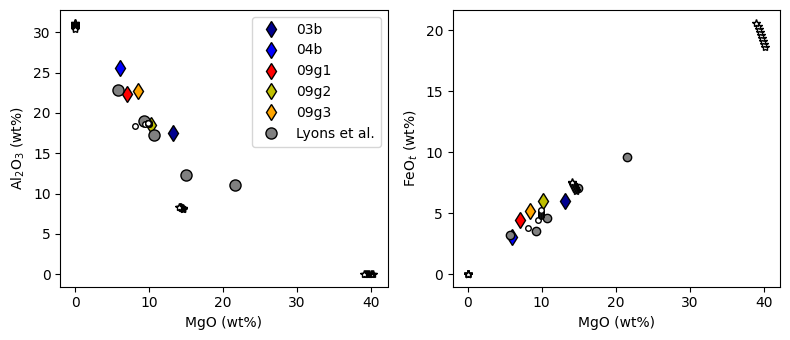

In [80]:
f, a = plt.subplots(1,2, figsize = (8,3.5))
for s in color:
    a[0].plot(WholeRock.loc[s, 'MgO'],
            WholeRock.loc[s, 'Al2O3'],
            'dk', mfc = color[s], zorder = 1, label = s, ms = 8)
    a[1].plot(WholeRock.loc[s, 'MgO'],
            WholeRock.loc[s, 'FeO'],
            'dk', mfc = color[s], zorder = 1, label = s, ms = 8)

a[0].plot(Lyons['MgO'], Lyons['Al2O3'], 'ok', mfc = (0.5,0.5,0.5), label = "Lyons et al.", ms = 8)
a[0].plot(total.loc[1:10,'MgO'], total.loc[1:10,'Al2O3'], '.k', mfc = 'w', ms = 8)
# a[0].plot(total.loc[1:10,'MgO']*0.8 + liq.loc[1:10, 'MgO']*0.2, 
#           total.loc[1:10,'Al2O3']*0.8 + liq.loc[1:10, 'Al2O3']*0.2, '.r')

a[1].plot(Lyons['MgO'], Lyons['FeO'], 'ok', mfc = (0.5,0.5,0.5), label = "Lyons et al.")
a[1].plot(total.loc[1:10,'MgO'], total.loc[1:10,'FeOt'], '.k', mfc = 'w', ms = 8)
# a[1].plot(total.loc[1:10,'MgO']*0.8 + liq.loc[1:10, 'MgO']*0.2, 
#           total.loc[1:10,'FeOt']*0.8 + liq.loc[1:10, 'FeOt']*0.2, '.r')

a[0].plot(plg.loc[1:10,'MgO'], plg.loc[1:10,'Al2O3'], '*k', mfc = 'w')
a[0].plot(cpx.loc[1:10,'MgO'], cpx.loc[1:10,'Al2O3'], '*k', mfc = 'w')
a[0].plot(ol.loc[1:10,'MgO'], ol.loc[1:10,'Al2O3'], '*k', mfc = 'w')

a[1].plot(plg.loc[1:10,'MgO'], plg.loc[1:10,'FeOt'], '*k', mfc = 'w')
a[1].plot(cpx.loc[1:10,'MgO'], cpx.loc[1:10,'FeOt'], '*k', mfc = 'w')
a[1].plot(ol.loc[1:10,'MgO'], ol.loc[1:10,'FeOt'], '*k', mfc = 'w')

a[0].set_xlabel('MgO (wt%)')
a[1].set_xlabel('MgO (wt%)')

a[0].set_ylabel('Al$_2$O$_3$ (wt%)')
a[1].set_ylabel('FeO$_t$ (wt%)')

a[0].legend()

f.tight_layout()



plt.savefig('WR_Cumulate.svg', dpi = 600, format = 'svg')